In [2]:
import numpy as np
import os
import pandas as pd
import matplotlib as mpl
mpl.use('Agg')

mpl.rcParams['figure.figsize'] = (5,5)
mpl.rcParams['figure.facecolor'] = (1,1,1,1)
mpl.rcParams.update({'font.size':22})

% matplotlib inline

import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle

from importlib import reload

In [3]:
import halo_cnn
from halo_cnn.model import BaseHaloCNNRegressor
from halo_cnn.data import HaloCNNDataManager

Using Theano backend.


In [4]:
reload(halo_cnn)

<module 'halo_cnn' from '/home/mho1/halo_cnn/halo_cnn/__init__.py'>

In [5]:
wdir = '/home/mho1/scratch/halo_cnn'
imdir = '/home/mho1/halo_cnn/paper_images'

# Testing halo_cnn

In [4]:
model = halo_cnn.model.BaseHaloCNNRegressor(input_shape=(48,48))
data_manager = halo_cnn.data.HaloCNNDataManager(input_shape=(48,48),sample_rate=0.05)

In [5]:
catalog = data_manager.load_catalog('/home/mho1/scratch/halo_cnn/data_mocks/Rockstar_UM_z=0.000_contam.p')

Loading catalog from: /home/mho1/scratch/halo_cnn/data_mocks/Rockstar_UM_z=0.000_contam.p


In [31]:
data = data_manager.preprocess(catalog, ['vlos','Rproj'], n_proc=7)

100%|██████████| 14824/14824 [00:34<00:00, 433.32it/s]


In [32]:
del(catalog)

In [33]:
X = data['pdf']
Y = data_manager.regularize(data['logmass'])

In [34]:
(data['logmass']==data_manager.deregularize(Y)).all()

True

In [14]:
X[8].shape

(48, 48)

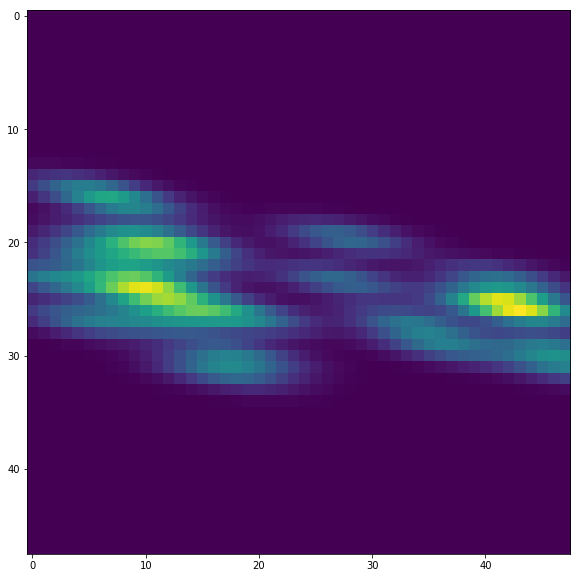

In [35]:
plt.imshow(X[8])

# Scratch

In [29]:
sample = data_manager._build_mesh(['vlos','Rproj'])
data = np.stack([catalog.gal[50]['vlos'],catalog.gal[50]['Rproj']],axis=1)
kdeval = data_manager.sample_kde(data,sample)

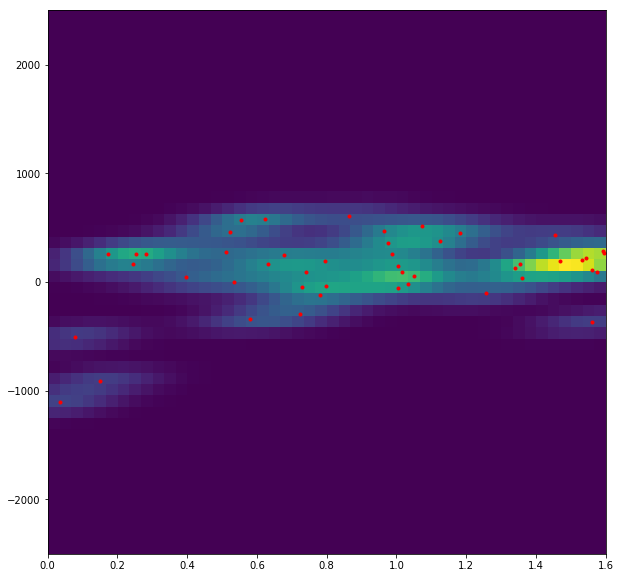

In [30]:
plt.imshow(kdeval, extent=[0,data_manager.aperture,-data_manager.vcut,data_manager.vcut],origin='lower', aspect='auto')
plt.plot((data.T)[1],(data.T)[0],'r.')

In [40]:
sample_flat = np.transpose(sample,(len(sample.shape)-1,
                                   *np.arange(len(sample.shape)-1)))
sample_flat = np.reshape(sample_flat,
                     (sample.shape[-1],
                      np.product(sample.shape[:-1])))

sample_kdeval = np.reshape(sample_flat[0], sample.shape[:-1]).T
        

In [45]:
np.arange(5,-1, step=-1)

array([5, 4, 3, 2, 1, 0])

In [13]:
data_manager._build_mesh(['vlos']).shape

(48, 1)

In [ ]:
v_pos = np.linspace(-4800, 4800, 48 + 1)
a_pos = np.linspace(0, 3, 48 + 1)
v_pos = [np.mean(v_pos[[i,i+1]]) for i in range(len(v_pos)-1)]
a_pos = [np.mean(a_pos[[i,i+1]]) for i in range(len(a_pos)-1)]

mesh = np.meshgrid(a_pos,v_pos)
np.transpose(mesh,(1,2,0))

In [5]:
dat = np.zeros(shape=(48,48,2))
dat[:,:,0]=mesh[0]
dat[:,:,1]=mesh[1]
dat

array([[[ 3.12500e-02, -4.70000e+03],
        [ 9.37500e-02, -4.70000e+03],
        [ 1.56250e-01, -4.70000e+03],
        ...,
        [ 2.84375e+00, -4.70000e+03],
        [ 2.90625e+00, -4.70000e+03],
        [ 2.96875e+00, -4.70000e+03]],

       [[ 3.12500e-02, -4.50000e+03],
        [ 9.37500e-02, -4.50000e+03],
        [ 1.56250e-01, -4.50000e+03],
        ...,
        [ 2.84375e+00, -4.50000e+03],
        [ 2.90625e+00, -4.50000e+03],
        [ 2.96875e+00, -4.50000e+03]],

       [[ 3.12500e-02, -4.30000e+03],
        [ 9.37500e-02, -4.30000e+03],
        [ 1.56250e-01, -4.30000e+03],
        ...,
        [ 2.84375e+00, -4.30000e+03],
        [ 2.90625e+00, -4.30000e+03],
        [ 2.96875e+00, -4.30000e+03]],

       ...,

       [[ 3.12500e-02,  4.30000e+03],
        [ 9.37500e-02,  4.30000e+03],
        [ 1.56250e-01,  4.30000e+03],
        ...,
        [ 2.84375e+00,  4.30000e+03],
        [ 2.90625e+00,  4.30000e+03],
        [ 2.96875e+00,  4.30000e+03]],

       [[ 3.125

In [6]:
data = np.array([[0,400],[3,3000],[2,4000],[1,500]])
# data = np.reshape(data,(*data.shape,1))
data.shape

(4, 2)

In [7]:
data_manager.sample_kde(data,dat)

ValueError: cannot reshape array of size 2304 into shape (48,)

array([ 3.125e-02, -4.700e+03])

In [24]:
import colossus
from colossus.cosmology import cosmology
cosmo = cosmology.setCosmology('planck15');
from colossus.lss import mass_function

s8_save = cosmo.sigma8
Om_save = cosmo.Om0

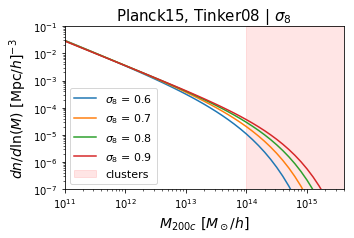

In [53]:
cosmo = cosmology.setCosmology('planck15');
M = 10**np.arange(11.0, 15.5, 0.1)

f = plt.figure(figsize=(5,3))
for s8 in [0.6,0.7,0.8,0.9]:
    cosmo.sigma8 = s8
    mfunc = mass_function.massFunction(M, 0.0, mdef = '200c', model = 'tinker08', q_out = 'dndlnM')
    plt.plot(M, mfunc, '-', label = '$\sigma_8$ = %.1f' % s8)
    
plt.title('Planck15, Tinker08 | $\sigma_8$', fontsize=15)
plt.xlabel('$M_{200c}$ [$M_\odot/h$]', fontsize=14)
plt.ylabel('$dn/d\ln(M)$ [Mpc$/h$]$^{-3}$', fontsize=14)
plt.loglog()
plt.xlim(1E11, 4E15)
plt.ylim(1E-7, 1E-1)
plt.axvspan(1e14,4e15,color='red',alpha=0.10, label='clusters')
plt.legend(fontsize=11);

f.savefig(os.path.join(imdir, 'HMF_s8.png'),bbox_inches='tight',dpi=400)

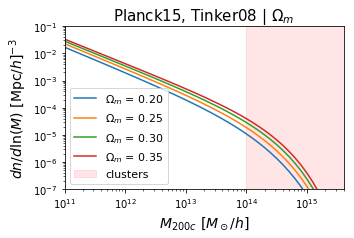

In [56]:
cosmo = cosmology.setCosmology('planck15');

M = 10**np.arange(11.0, 15.5, 0.1)

f = plt.figure(figsize=(5,3))
for Om in [0.2,0.25,0.3,0.35]:
    cosmo.Om0 = Om
    mfunc = mass_function.massFunction(M, 0.0, mdef = '200c', model = 'tinker08', q_out = 'dndlnM')
    plt.plot(M, mfunc, '-', label = '$\Omega_m$ = %.2f' % Om)
    
plt.title('Planck15, Tinker08 | $\Omega_m$', fontsize=15)
plt.xlabel('$M_{200c}$ [$M_\odot/h$]', fontsize=14)
plt.ylabel('$dn/d\ln(M)$ [Mpc$/h$]$^{-3}$', fontsize=14)
plt.loglog()
plt.xlim(1E11, 4E15)
plt.ylim(1E-7, 1E-1)
plt.axvspan(1e14,4e15,color='red',alpha=0.10, label='clusters')
plt.legend(fontsize=11);

f.savefig(os.path.join(imdir, 'HMF_Om.png'),bbox_inches='tight',dpi=400)

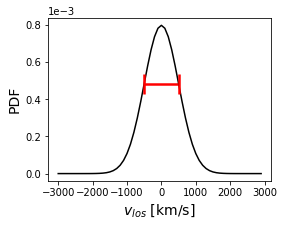

In [30]:
def N(x,mu,sigma):
    return (2*np.pi*sigma**2)**(-0.5)*np.exp(-(x-mu)**2/(2*sigma**2))

f,ax = plt.subplots(figsize=(4,3))
X = np.arange(-3000,3000,100)
plt.plot(X, N(X,0,500),'k')
plt.errorbar(0,N(500,0,500),color='r',xerr=500, capsize=10, elinewidth=2.5, capthick=2.5)


plt.ylabel('PDF', fontsize=14)
plt.xlabel('$v_{los}$ [km/s]', fontsize=14)
plt.ticklabel_format(style='sci', axis='y', scilimits=(0,3))
f.savefig(os.path.join(imdir, 'v_disp.png'),bbox_inches='tight',dpi=400)